In [161]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as glm, Ridge, LinearRegression as lm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [100]:
from sklearn.linear_model import LinearRegression as lm

In [101]:
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)

In [102]:
from sklearn.preprocessing import StandardScaler

In [262]:
data=pd.read_csv('winequality-white.csv',sep=';')

In [192]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [193]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [194]:
X=data.drop('quality',axis=1)

In [195]:
y=data.quality

In [196]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [197]:
scaler=StandardScaler()

In [198]:
X_train_scaled=scaler.fit_transform(X_train)

In [199]:
X_test_scaled=scaler.fit_transform(X_test)

In [200]:
fit=lm()

In [201]:
fit.fit(X_train_scaled,y_train)

LinearRegression()

In [5]:
from sklearn.metrics import mean_squared_error

In [204]:
mean_squared_error(y_test,fit.predict(X_test_scaled))

0.548682924256052

In [205]:
mean_squared_error(y_train,fit.predict(X_train_scaled))

0.5721338332176815

In [95]:
X_train_scaled

array([[ 1.87398157, -0.79239724,  0.37317153, ...,  1.00382519,
         2.92635181, -1.30933492],
       [ 0.66932557,  0.63075372, -0.44183356, ...,  0.20218373,
         0.01505524, -0.16544863],
       [ 0.06699757, -0.79239724,  1.35117763, ..., -0.26544045,
         0.54438189, -0.24715479],
       ...,
       [ 0.78979117,  0.63075372, -0.44183356, ...,  0.06857682,
         0.10327634,  2.20403012],
       [-0.17393363,  0.63075372, -0.60483458, ..., -1.26749226,
        -0.16138698,  1.38696849],
       [-1.49905523,  4.23945795, -2.23484476, ...,  1.67185973,
        -0.42605031, -0.24715479]])

In [216]:
pd.DataFrame({'coef':abs(a),'feature':list(X_train)}).sort_values(by=['coef'])

,coef,feature
2,0.000000,citric acid
6,0.001238,total sulfur dioxide
4,0.010104,chlorides
0,0.010594,fixed acidity
5,0.025025,free sulfur dioxide
9,0.035546,sulphates
8,0.037111,pH
7,0.150625,density
1,0.188019,volatile acidity
3,0.215745,residual sugar


In [206]:
a=abs(fit.coef_)

In [164]:
abs(fit.coef_)

array([8.37479468e-02, 1.79930690e+00, 6.69995051e-02, 9.41595618e-02,
       6.14668413e-01, 3.53297249e-03, 3.96635699e-04, 1.93820940e+02,
       7.95061921e-01, 6.09534205e-01, 1.35995021e-01])

In [210]:
lasso=Lasso(alpha=0.01,random_state=17)

In [213]:
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.01, random_state=17)

In [215]:
a=abs(lasso.coef_)

In [217]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(alphas=alphas,cv=5)
lasso_cv.fit(X_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        cv=5)

In [218]:
lasso_cv.alpha_

0.005478901179593945

In [219]:
lasso=Lasso(alpha=0.005478901179593945,random_state=17)

In [220]:
lasso.fit(X_train_scaled,y_train)

Lasso(alpha=0.005478901179593945, random_state=17)

In [222]:
mean_squared_error(y_train,lasso.predict(X_train_scaled))

0.5738034153862729

In [223]:
mean_squared_error(y_test,lasso.predict(X_test_scaled))

0.5515771480171293

In [250]:
rf=RandomForestRegressor(max_depth=15,random_state=17)

In [251]:
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(max_depth=15, random_state=17)

In [252]:
mean_squared_error(y_train,rf.predict(X_train_scaled))

0.08371742943370199

In [253]:
mean_squared_error(y_test,rf.predict(X_test_scaled))

0.4034220242949872

In [230]:
cross_val_score(rf,X_train_scaled,y_train,scoring='neg_mean_squared_error').mean()

-0.41400259628439484

In [231]:
forest_params = {'max_depth': list(range(10, 25)), 
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

In [237]:
rf=RandomForestClassifier(max_depth=19, max_features=7, min_samples_leaf=1,random_state=17)

In [241]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=19, max_features=7, random_state=17)

In [242]:
print(mean_squared_error(y_train,rf.predict(X_train_scaled)),
mean_squared_error(y_test,rf.predict(X_test_scaled)),
cross_val_score(rf,X_train_scaled,y_train,scoring='neg_mean_squared_error').mean())

0.0 0.47210884353741495 -0.5040773765189079


In [244]:
pd.DataFrame(rf.feature_importances_,list(X_train))

,0
fixed acidity,0.073884
volatile acidity,0.105289
citric acid,0.078415
residual sugar,0.086388
chlorides,0.084459
free sulfur dioxide,0.092087
total sulfur dioxide,0.092065
density,0.092040
pH,0.085369
sulphates,0.077546


In [264]:
data=pd.read_csv('day.csv')

In [35]:
data.dteday=pd.to_datetime(data.dteday)

In [37]:
data.drop('instant',axis=1,inplace=True)

In [38]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [51]:
data[['temp','atemp','hum','windspeed']]=data[['temp','atemp','hum','windspeed']]/10

In [174]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,3.44167,3.63625,8.05833,1.60446,331,654,985
1,1,0,1,0,0,0,2,3.63478,3.53739,6.96087,2.48539,131,670,801
2,1,0,1,0,1,1,1,1.96364,1.89405,4.37273,2.48309,120,1229,1349
3,1,0,1,0,2,1,1,2.00000,2.12122,5.90435,1.60296,108,1454,1562
4,1,0,1,0,3,1,1,2.26957,2.29270,4.36957,1.86900,82,1518,1600


In [175]:
X=data.drop(['cnt'],axis=1)

In [176]:
y=data.cnt

In [58]:
import seaborn as sns

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

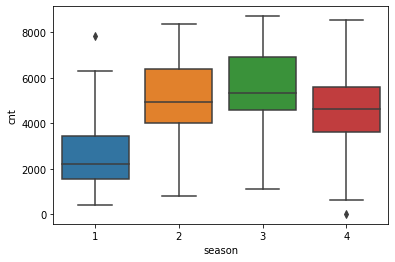

In [59]:
sns.boxplot(data['season'],data['cnt'])

In [62]:
a=data.loc[(data.season==1)]

In [63]:
a[a.cnt==a.cnt.max()]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
441,2012-03-17,1,1,3,0,6,0,2,5.14167,5.05046,7.55833,1.10704,3155,4681,7836


In [66]:
data.drop('dteday',axis=1,inplace=True)

<AxesSubplot:>

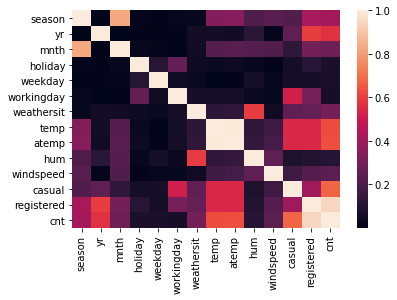

In [69]:
sns.heatmap(abs(data.corr()))

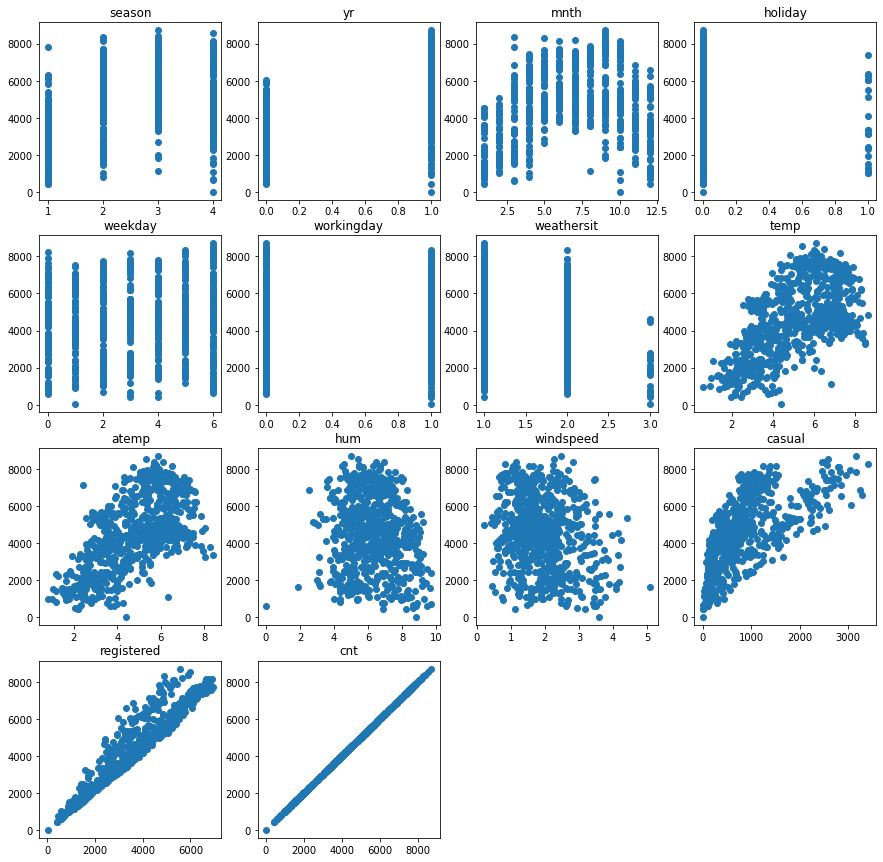

In [89]:
plt.rcParams["figure.figsize"] = (15,15)
for i,col in enumerate(data.columns):
    plt.subplot(4,4,i+1)
    plt.scatter(data[col],data['cnt'])
    plt.title(col)

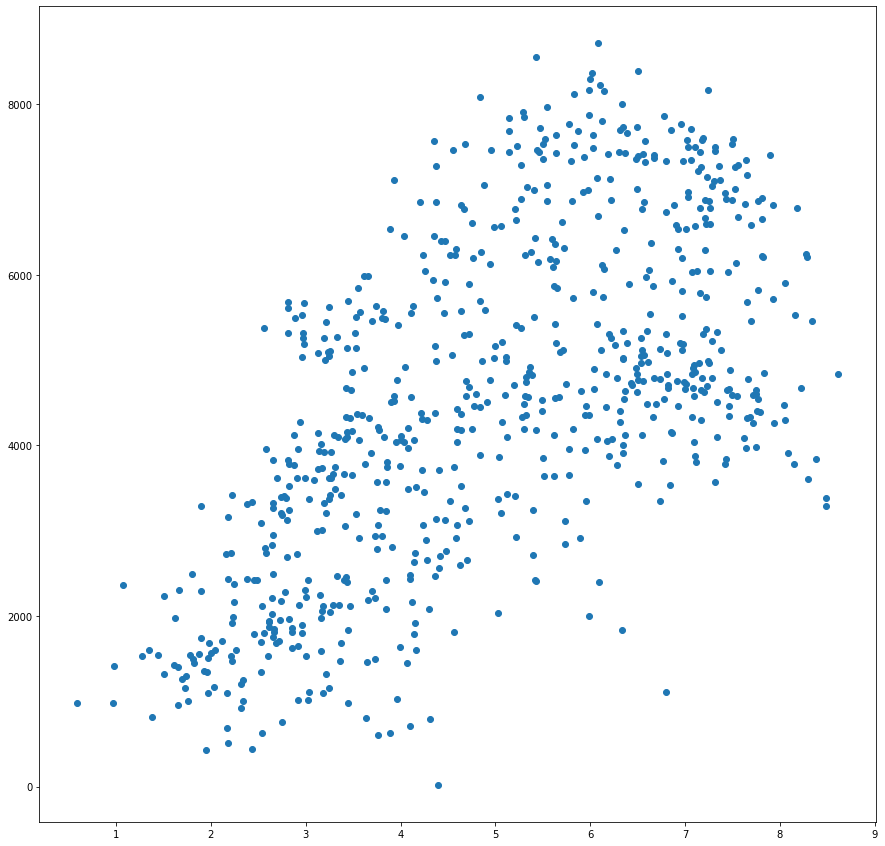

In [95]:
plt.scatter(data.temp,data.cnt)

In [105]:
from sklearn.linear_model import LassoCV, RidgeCV, Lasso

In [107]:
from sklearn.preprocessing import StandardScaler

In [178]:
fit=lm()
lasso=Lasso(random_state=17)
ridge=Ridge(random_state=17)
search_lasso=LassoCV(random_state=17)
search_ridge=RidgeCV()

TypeError: 'LinearRegression' object is not callable

In [179]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,3.44167,3.63625,8.05833,1.60446,331,654
1,1,0,1,0,0,0,2,3.63478,3.53739,6.96087,2.48539,131,670
2,1,0,1,0,1,1,1,1.96364,1.89405,4.37273,2.48309,120,1229
3,1,0,1,0,2,1,1,2.00000,2.12122,5.90435,1.60296,108,1454
4,1,0,1,0,3,1,1,2.26957,2.29270,4.36957,1.86900,82,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,2.54167,2.26642,6.52917,3.50133,247,1867
727,1,1,12,0,5,1,2,2.53333,2.55046,5.90000,1.55471,644,2451
728,1,1,12,0,6,0,2,2.53333,2.42400,7.52917,1.24383,159,1182
729,1,1,12,0,0,0,1,2.55833,2.31700,4.83333,3.50754,364,1432


In [164]:
y

0      0
1      0
2      0
3      0
4      0
      ..
726    1
727    1
728    1
729    1
730    1
Name: yr, Length: 731, dtype: int64

In [180]:
X.drop(['casual','registered'],axis=1,inplace=True)

In [181]:
sh=int(X.shape[0]*0.7)

In [182]:
X_train,y_train=X[:sh],y[:sh]

In [183]:
X_test,y_test=X[sh:],y[sh:]

In [184]:
X_train

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,3.44167,3.63625,8.05833,1.60446
1,1,0,1,0,0,0,2,3.63478,3.53739,6.96087,2.48539
2,1,0,1,0,1,1,1,1.96364,1.89405,4.37273,2.48309
3,1,0,1,0,2,1,1,2.00000,2.12122,5.90435,1.60296
4,1,0,1,0,3,1,1,2.26957,2.29270,4.36957,1.86900
...,...,...,...,...,...,...,...,...,...,...,...
506,2,1,5,0,1,1,2,5.98333,5.65667,8.11250,2.33204
507,2,1,5,0,2,1,2,6.15000,5.80825,7.65833,1.18167
508,2,1,5,0,3,1,2,6.21667,5.84612,7.74583,1.02000
509,2,1,5,0,4,1,1,6.55000,6.06700,7.16667,1.72896


In [185]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [186]:
lm.fit(X_train_scale,y_train)

LinearRegression()

In [187]:
np.sqrt(mean_squared_error(y_test,lm.predict(X_test_scale)))

1120.8835610678543

In [191]:
lm.score(X_test_scale,y_test)

0.5392833033321793

In [198]:
pd.DataFrame(abs(lm.coef_),list(X)).sort_values(by=0,ascending=False)

,0
yr,954.509491
atemp,884.945794
season,404.004694
weathersit,293.265300
windspeed,188.234735
hum,159.150642
weekday,103.504440
temp,68.805109
holiday,67.756101
mnth,31.073051


In [249]:
def train_valid(model,X_train_scale,y_train,X_test_scale,y_test,names,forest=False):
        model.fit(X_train_scale,y_train)
        print(np.sqrt(mean_squared_error(y_test,model.predict(X_test_scale))))
        if forest:print(pd.DataFrame(model.feature_importances_,names,columns=['imp']).sort_values(by='imp',ascending=False))
        else:
            print(pd.DataFrame(model.coef_,names,columns=['coef']).sort_values(by='coef',ascending=False))

In [256]:
train_valid(RandomForestRegressor(random_state=17,n_estimators=400,n_jobs=-1),X_train_scale,y_train,X_test_scale,y_test,list(X),1)

1046.6633602159127
                 imp
temp        0.301481
atemp       0.240257
yr          0.199593
hum         0.071551
season      0.062410
windspeed   0.037508
weathersit  0.030498
mnth        0.028110
weekday     0.020359
workingday  0.005440
holiday     0.002793


In [251]:
RandomForestRegressor?

In [266]:
data.dteday=pd.to_datetime(data.dteday)

<AxesSubplot:xlabel='dteday', ylabel='dteday'>

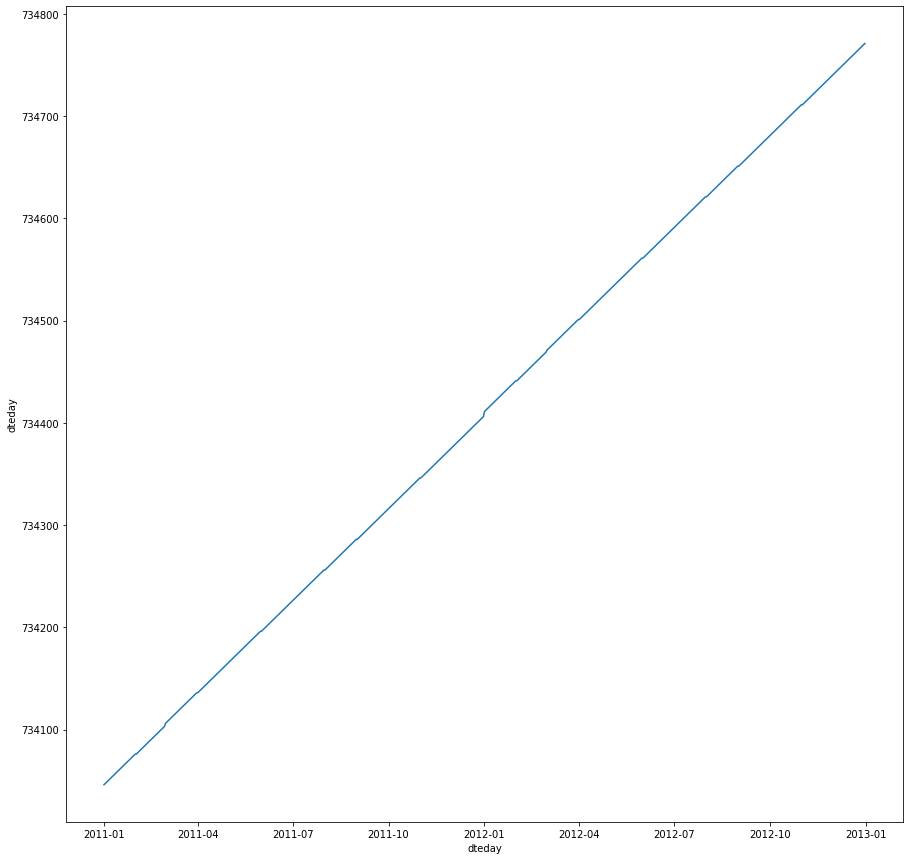